# A. Fungsi Diskriminan

## 1. Fisher Linear Discriminant

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv as inv
from scipy.stats import norm as norm
from sklearn.model_selection import train_test_split

In [ ]:
def plot_pdfs(mean1, mean2, std1, std2, threshold, dataset_name):
    X_axis = np.linspace(-3.0,3.0,100000)
    plt.plot(X_axis, norm.pdf(X_axis, mean1, std1),'-', color='b',label='Class 1 (value 1)')
    plt.plot(X_axis, norm.pdf(X_axis, mean2, std2),'-', color='r',label='Class 2 (value 0)')
    plt.plot([threshold], norm.pdf([threshold], mean1, std1), '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Normal distributions. Threshold = '+ str(threshold))
    plt.savefig('contentplots' + str(dataset_name) + '_FldaNormDistribution.png')
    plt.show()

In [ ]:
def plot_projections(projections, y_test, threshold, dataset_name):
    proj_pred_data = pd.DataFrame(np.concatenate((projections, y_test), axis=1))
    proj1_pred = proj_pred_data.loc[proj_pred_data[1] == 1][[0]]
    proj2_pred = proj_pred_data.loc[proj_pred_data[1] == 0][[0]]
    plt.plot(proj1_pred, np.ones(proj1_pred.shape), '.', color='b', label='Class 1 (value 1)')
    plt.plot(proj2_pred, np.ones(proj2_pred.shape), '.', color='r',label='Class 2 (value 0)')
    plt.plot([threshold], [1], '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Projections onto W vector. Threshold = '+ str(threshold))
    plt.savefig('plots' + str(dataset_name) + '_FldaProjections.png')
    plt.show()

In [ ]:
def solve_pdfs(pdf_mean_1, pdf_mean_2, pdf_std_1, pdf_std_2):
    coeff1 = 1/(2*pdf_std_1**2) - 1/(2*pdf_std_2**2)
    coeff2 = pdf_mean_2/(pdf_std_2**2) - pdf_mean_1/(pdf_std_1**2)
    coeff3 = pdf_mean_1**2 /(2*pdf_std_1**2) - pdf_mean_2**2 / (2*pdf_std_2**2) - np.log(pdf_std_2/pdf_std_1)

    coeffs = [coeff1, coeff2, coeff3]

    roots_of_eq = np.roots(coeffs)
    threshold = roots_of_eq[1]
    return threshold

In [ ]:
def find_w_cordinates(X_train1, X_train2):

    Mean1 = np.mean(X_train1,axis=0)
    Mean2 = np.mean(X_train2,axis=0)
    Mean_difference = np.subtract(Mean1,Mean2)

    Cov1 = np.cov(np.transpose(X_train1))
    Cov2 = np.cov(np.transpose(X_train2))

    Sw_inv = np.linalg.inv(np.add(Cov1,Cov2))

    W = np.dot(Sw_inv,Mean_difference)

    W_norm = W / np.linalg.norm(W)

    return W_norm

In [ ]:
def find_threshold(X_train1, X_train2, W, dataset_name):

    Proj1 = np.dot(W,X_train1.transpose())
    Proj2 = np.dot(W,X_train2.transpose())

    proj_mean1 = np.mean(Proj1)
    proj_mean2 = np.mean(Proj2)

    proj_std1 = np.std(Proj1)
    proj_std2 = np.std(Proj2)

    threshold = solve_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2)

    plot_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2, threshold, dataset_name)
    return threshold

In [ ]:
def find_predictions(X_test, W, threshold):

    proj_testdata = np.dot(W, X_test.transpose()).reshape(X_test.shape[0],1)

    predictions = (proj_testdata >= threshold).astype(int).reshape(X_test.shape[0],1)

    return proj_testdata, predictions

In [ ]:
def accuracy(actual, predicted):

    return np.mean((actual == predicted).astype(int))

In [ ]:
def precision(actual, predicted):

    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted == 1)).astype(int))
    return TP/(TP + FP)

In [ ]:
def recall(actual, predicted):

    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 0)).astype(int))
    return TP/(TP + FN)

In [ ]:
def f_score(actual , predicted):

    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

In [ ]:
def fisher(X_train1, X_train2, X_test, y_test, dataset_name):

    W = find_w_cordinates(X_train1, X_train2)

    threshold = find_threshold(X_train1, X_train2, W, dataset_name)

    projections, y_predicted = find_predictions(X_test, W, threshold)

    plot_projections(projections, y_test, threshold, dataset_name)

    print('W',W)
    print('Threshold:',threshold)
    print('accuracy:',accuracy(y_test , y_predicted))
    print('precision:',precision(y_test , y_predicted))
    print('recall:',recall(y_test , y_predicted))
    print('f_score:',f_score(y_test , y_predicted))

TESTCASE - 1


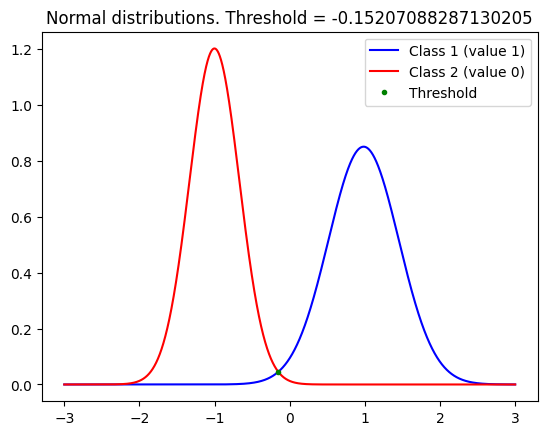

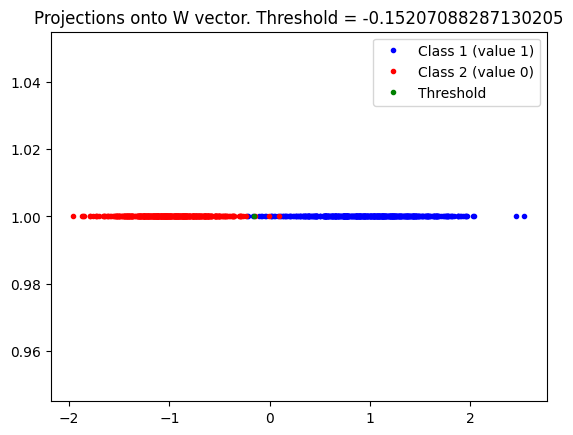

W [0.03304637 0.99945382]
Threshold: -0.15207088287130205
accuracy: 0.993
precision: 0.9939879759519038
recall: 0.992
f_score: 0.9929929929929929


In [ ]:
data = pd.read_csv('/content/a1_d1.csv', header=None)

"""
N = total number of points in the given dataset

X = [
     [f1, f2, f3, ..] (1),
     [f1, f2, f3, ..] (2),
     [..............] (.),
     [..............] (.),
     [..............] (N)
    ]

y = [label1, label2, label3, ....labelN]

"""

X = data[[0,1]]
y = data[[2]]

X_1 = data.loc[data[2]==1][[0,1]]
X_2 = data.loc[data[2]==0][[0,1]]

print('TESTCASE - 1')

fisher(X_1, X_2, X, y.values, "a1_d1")

TESTCASE - 2


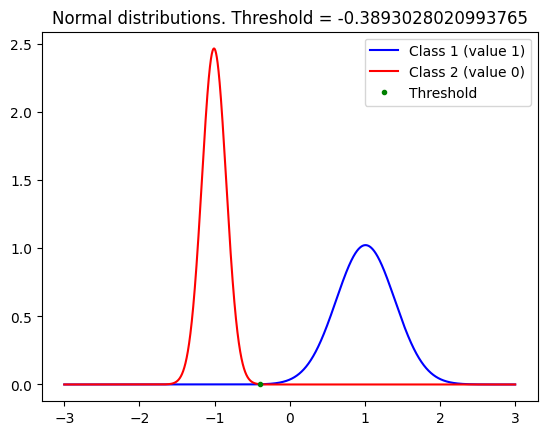

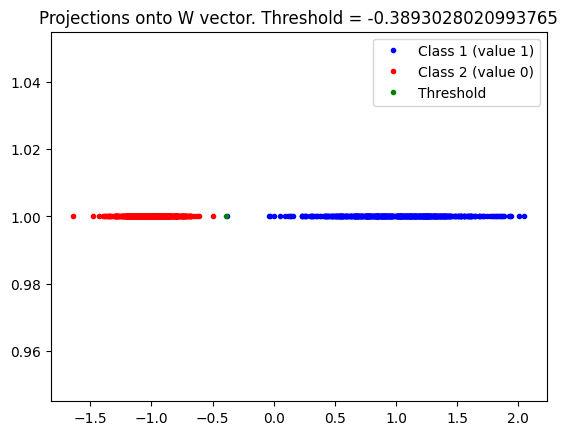

W [-0.00655686 -0.01823739  0.99981218]
Threshold: -0.3893028020993765
accuracy: 1.0
precision: 1.0
recall: 1.0
f_score: 1.0


In [ ]:
data = pd.read_csv('/content/a1_d2.csv', header=None)

X = data[[0,1,2]]
y = data[[3]]

X_1 = data.loc[data[3]==1][[0,1,2]]
X_2 = data.loc[data[3]==0][[0,1,2]]

print('TESTCASE - 2')
fisher(X_1, X_2, X, y.values, "a1_d2")

## 2. Perceptron


In [ ]:
def load_data():
  URL_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
  data = pd.read_csv(URL_, header = None)
  print(data)

  #membuat dataset dapat dipisahkan secara linear
  data = data[:100]
  data[4] = np.where(data.iloc[:, -1]=='Iris-setosa',0, 1)
  data = np.asmatrix(data, dtype = 'float64')
  return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


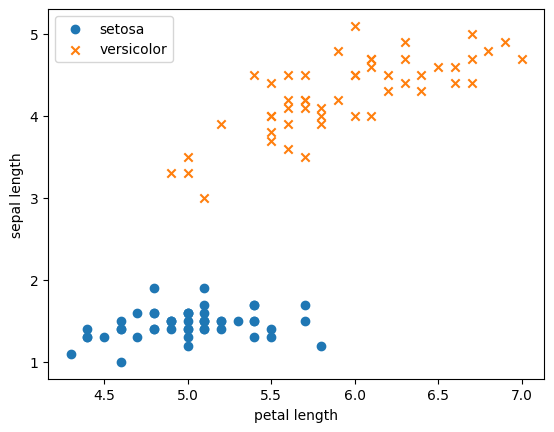

In [ ]:
plt.scatter(np. array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data [50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [ ]:
def perceptron(data, num_iter):
  features = data[:, :-1]
  labels = data[:, -1]
  #atur bobot ke nol
  w = np.zeros(shape=(1, features.shape[1]+1))
  misclassified_ = []
  for epoch in range(num_iter):
    misclassified = 0
    for x, label in zip(features, labels):
      x = np.insert(x,0,1)
      y = np.dot(w, x.transpose())
      target = 1.0 if (y > 0) else 0.0

      delta = (label.item(0,0) - target)

      if(delta):#misclassified
          misclassified += 1
          w += (delta * x)

    misclassified_.append(misclassified)
  return (w, misclassified_)

num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

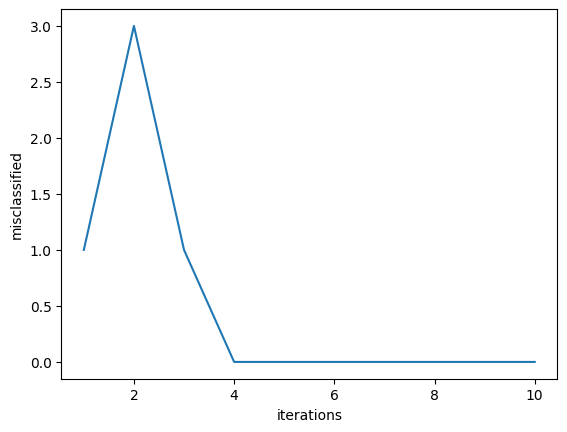

In [ ]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

### Klasifikasi iris virginica dan versicolor

In [ ]:
def load_data():
    URL_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)

    # Membuat dataset dapat dipisahkan secara linier
    data = data [50:]
    data[4] = np.where(data.iloc[:, -1]=='Iris-versicolor', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


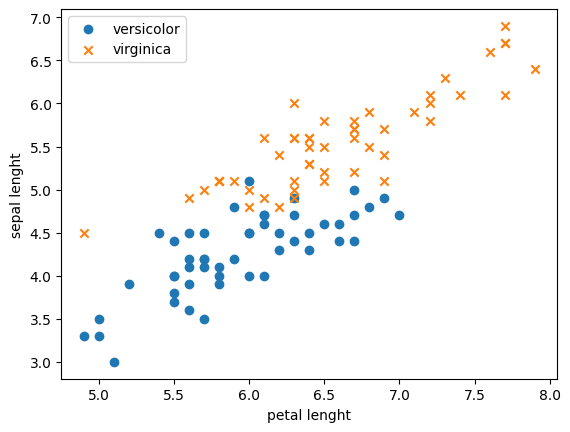

In [ ]:
plt.scatter(np.array(data[:50 ,0]), np.array(data[:50 ,2]), marker='o', label='versicolor')
plt.scatter(np.array(data[ 50: ,0]), np.array(data[50: ,2]), marker='x', label='virginica')
plt.xlabel('petal lenght')
plt.ylabel('sepal lenght')
plt.legend()
plt.show()

In [ ]:
def perceptron(data, num_iter):
    features = data[:, : -1]
    labels = data[:, -1]
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_ = []
    for epoch in range(num_iter):
      misclassified = 0
      for x, label in zip(features, labels):
          x = np.insert(x,0,1)
          y= np.dot(w, x.transpose())
          target = 1.0 if (y > 0) else 0.0

          delta = (label.item(0,0) - target)

          if(delta):
            misclassified +=1
            w += (delta * x)

      misclassified_.append(misclassified)
    return(w, misclassified_)
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

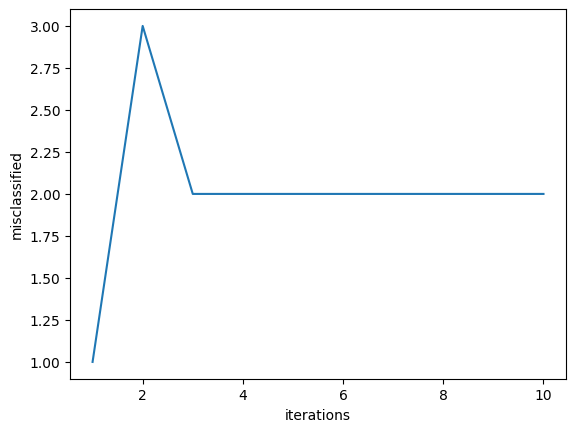

In [ ]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

### Persamaan fungsi diskriminan dari pemograman diatas dengan penggambaran geometry fungsi diskriminan :

> <br><br>
$f(x) = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n $<br><br>

> Dengan keterangan :
1. $x_1, x_2, \ldots, x_n $ adalah nilai inputan $ x $,
2.  $w_0, w_1, w_2, \ldots, w_n $ adalah bobot.

> Persaman ini akan membentuk sebuah garis yang disebut hyperplane, garis ini mampu membagi daerah atau kelas yang sesuai dengan dua kelas yang berbeda. Jika $f(x)>0$, maka data akan diklasifikasikan ke kelas 1, dan jika $f(x)<0$, maka data akan diklasifikasikan ke kelas 2 atau kelas lain.

# B. Model Probabilistik

## 1. Pendekatan Diskriminatif (Regresi Logistik)

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('/content/Iklan_sosmed.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Membagi data ke dalam training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membuat model regresi logistik dari training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

<ipython-input-46-9bb3aaad1e7e>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


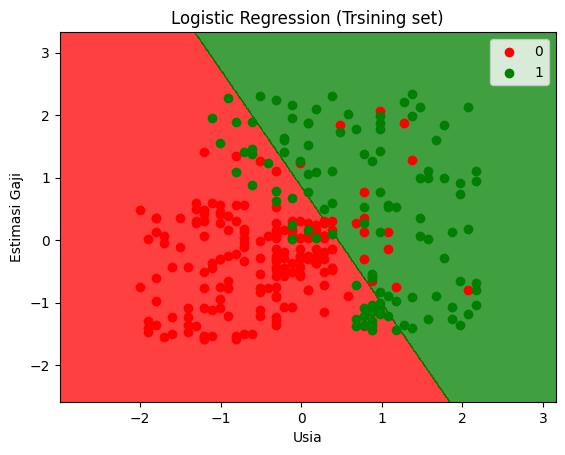

In [ ]:
# Memprediksi hasil modelnya ke test set
y_pred = classifier.predict(X_test)

# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Memvisualisasikan hasil training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Trsining set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

<ipython-input-47-5f920e69e200>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


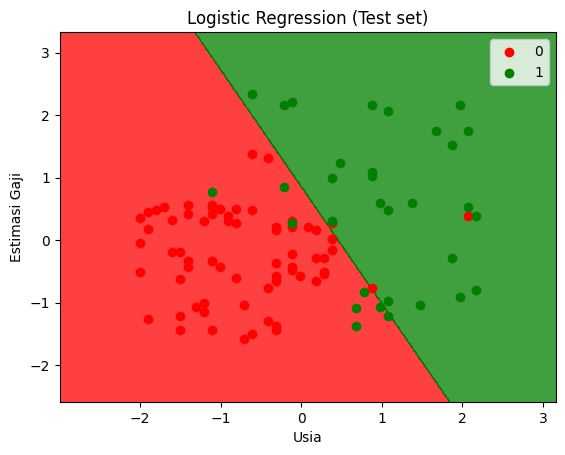

In [ ]:
# Memvisualisasikan hasil test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha =0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

### Perumusan matematis fungsi sigmoid :
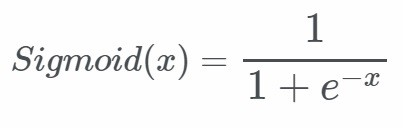

> Keterangan =
1. e menyatakan eksponensial ( Nilai Eluer)
2. x menyatakan output dari fungsi sigmoid

> Sigmoid adalah fungsi matematika yang mengonversi input berkelanjutan menjadi nilai antara 0 dan 1. Fungsi ini umumnya digunakan dalam regresi logistik untuk memodelkan probabilitas terjadinya suatu peristiwa karena sigmoid mengubah input kontinu yang merupakan kombinasi linear dari parameter regresi dan variabel prediktor.

## 2. Pendekatan Generatif (Naive Bayes)

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('/content/Iklan_sosmed.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Membagi data ke dalam training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membuat model Naive Bayes dari training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

<ipython-input-49-b6632683923a>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


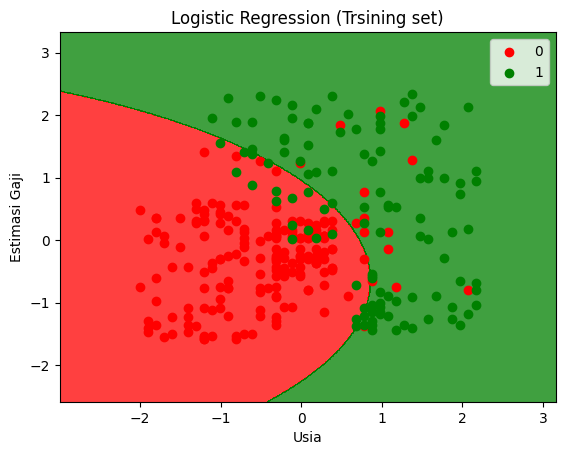

In [ ]:
# Memprediksi hasil modelnya ke test set
y_pred = classifier.predict(X_test)

# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Memvisualisasikan hasil model Naive Bayes dari training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Trsining set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

<ipython-input-50-4557c55d24cb>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


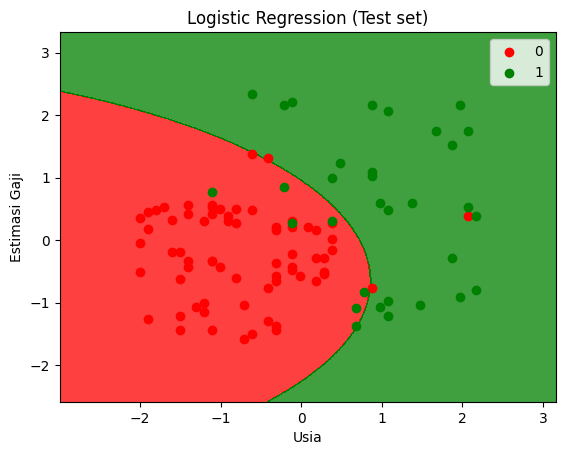

In [ ]:
# Memvisualisasikan hasil Naive Bayes dari test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha =0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

### Decision Boundaries

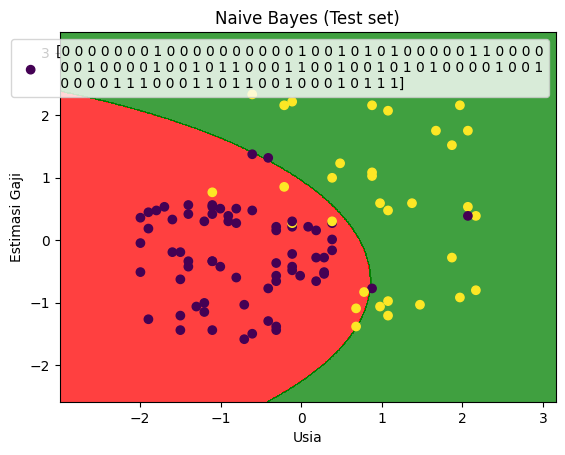

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1,stop = X_set[:, 0].max()+1,step = 0.01), np.arange(start = X_set[:, 1].min() -1,stop = X_set[:, 1].max()+1,step = 0.01))
predictions = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, predictions, alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c = y_test, label = y_test)
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.title('Naive Bayes (Test set)')
plt.legend()
plt.show()

#### Kesimpulan Hasil Klasifikasi :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



### Kesimpulan dari Studi kasus :
```pemilik showroom mobil untuk mengiklankan produk SUV nya dimedia sosial. Ia ingin agar iklannya ditempatkan di zona di mana semakin banyak orang yang memutuskan untuk membeli produknya. Kita akan membantunya dengan mengolah datapelanggan yang sudah diberikan ke kita.```

> Dapat ditarik kesimpulan bahwa dengan data yang ada dan diambil variabel usia dan estimasi gaji untuk melakukan prediksi dapat dianalisis berdasarkan decision boundary yang memisahkan 2 kelas yaitu beli dan tidak beli menggunakan model Naive Bayes didapatkan prediksi dengan nilai akurasi nya adalah 90% yang menandakan bahwa model ini dapat memprediksi 90% data uji yang ada dengan benar.

> Maka, berdasarkan dengan studi kasus yang ada, pelanggan dengan estimasi gaji yang lebih tinggi memiliki kemampuan untuk membeli produk SUV. Pemilik showroom sangat mampu menggunakan klasifikasi model naive bayes ini untuk mennempatkan iklan di media sosial dengan benar. Sehingga iklan tersebut mampu menarik pelanggan dengan tingkat pembelian lebih tinggi untuk produk SUV atau produk mobil lain nya.

> Jika ditanya seberapa sukses iklan maka dapat dikatakan bahwa iklan pada sosial media tersebut sukses dengan akurasi 90%.